In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn.metrics import silhouette_score



In [5]:
# Load the data
airlines_data = pd.read_csv('EastWestAirlines.csv')


In [6]:
# Display the first few rows of the dataset
print(airlines_data.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [7]:
# Extract features
features = airlines_data.iloc[:, 1:-1]  # Exclude 'ID' and 'Award' columns


In [8]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

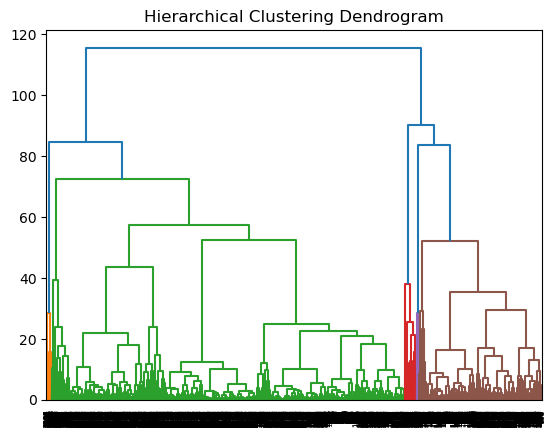

In [9]:
# Hierarchical Clustering
linkage_matrix = linkage(scaled_data, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [10]:

# Determine the number of clusters from the dendrogram

# K-means Clustering
# You may need to fine-tune the number of clusters based on your analysis
kmeans = KMeans(n_clusters=3, random_state=42)
airlines_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

d:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# DBSCAN Clustering
# You may need to fine-tune the parameters (eps and min_samples) based on your analysis
dbscan = DBSCAN(eps=1.5, min_samples=5)
airlines_data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

In [12]:
# Analyze the results
# You can analyze the clusters formed by each algorithm and draw inferences
# For example, you can use groupby to see the mean values of each cluster
print("KMeans Clusters:")
print(airlines_data.groupby('KMeans_Cluster').mean())
print("\nDBSCAN Clusters:")
print(airlines_data.groupby('DBSCAN_Cluster').mean())


KMeans Clusters:
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               2241.332397   42723.360498  104.475713   1.169811   1.020072   
1               1632.389137  115547.119792  138.718006   3.692708   1.001488   
2               1708.371951  198856.640244  790.414634   2.189024   1.036585   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000401   4341.837415     6.690887         213.171417   
1                1.031994  38945.476190    18.776786         316.902530   
2                1.030488  32951.237805    27.396341        5383.146341   

                Flight_trans_12  Days_since_enroll    Award?  DBSCAN_Cluster  
KMeans_Cluster                                                                
0                      0.649538        3695.4528

In [13]:
# Evaluate KMeans clusters using silhouette score
kmeans_silhouette = silhouette_score(scaled_data, airlines_data['KMeans_Cluster'])
print(f"\nSilhouette Score for KMeans Clusters: {kmeans_silhouette}")



Silhouette Score for KMeans Clusters: 0.3303711060539158


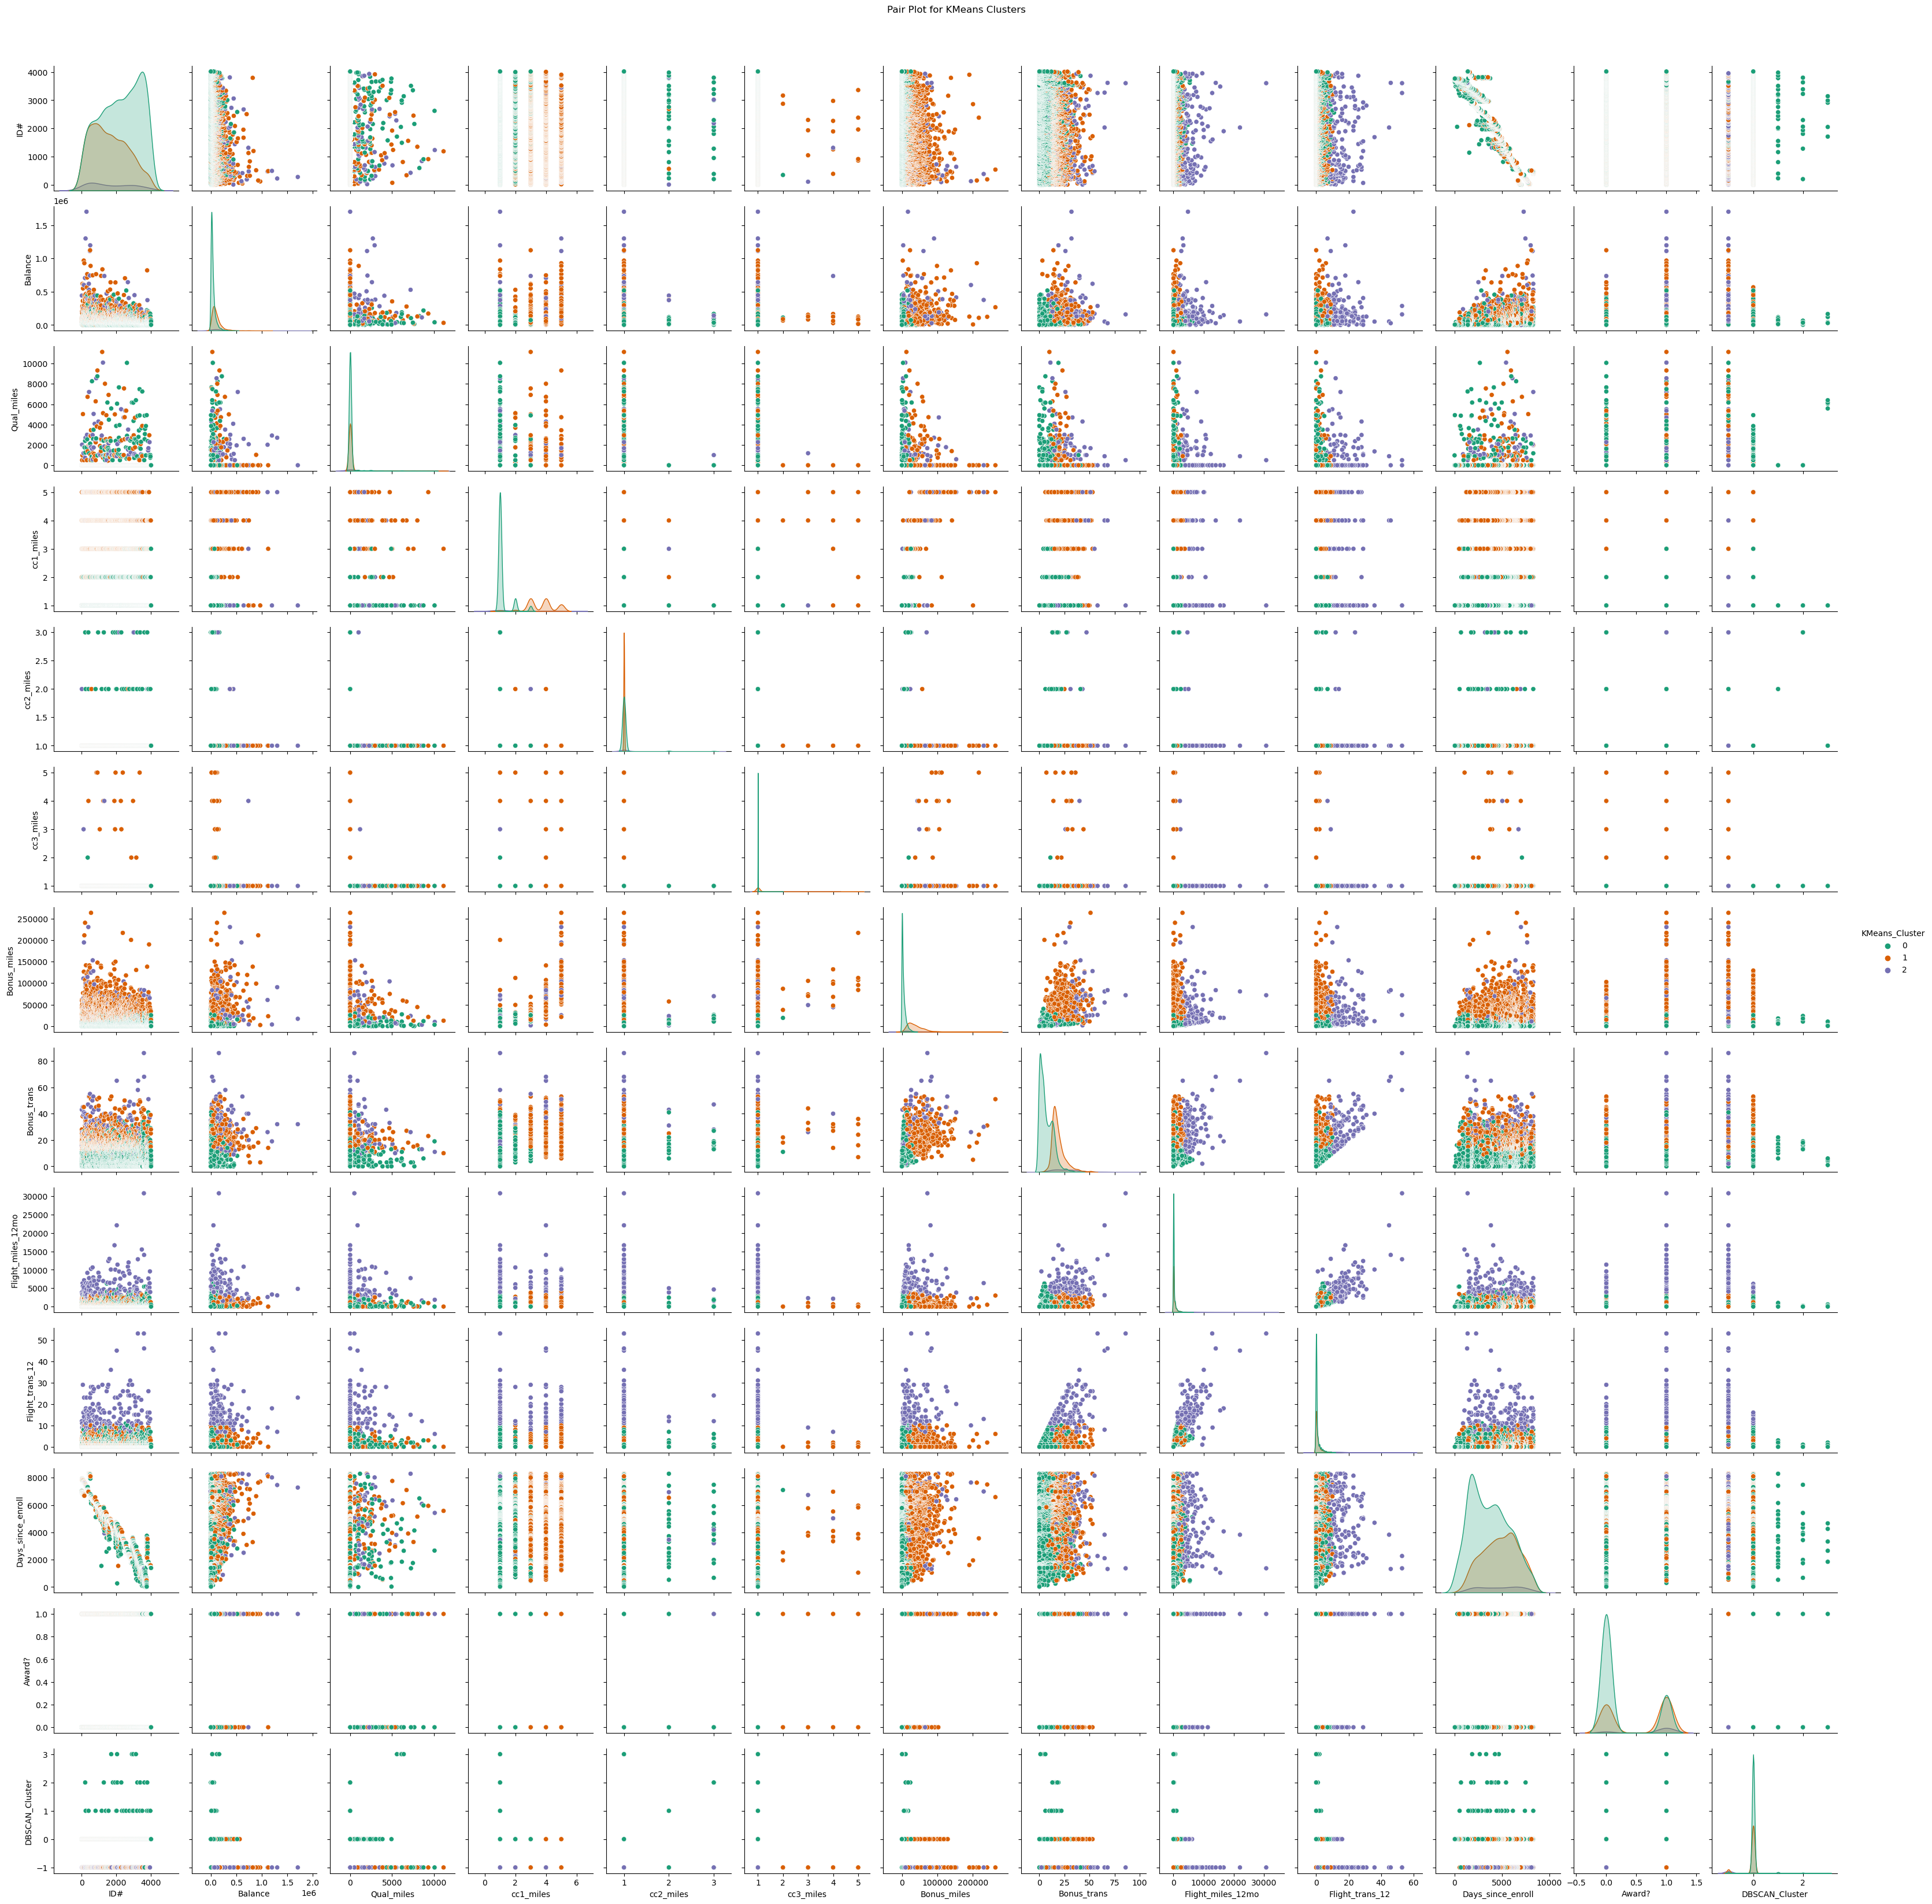

In [14]:
# Visualize the clusters with pair plots
# Pair plots help visualize relationships between different features for each cluster

# Pair plot for KMeans clusters
sns.pairplot(airlines_data, hue='KMeans_Cluster', palette='Dark2', diag_kind='kde')
plt.suptitle('Pair Plot for KMeans Clusters', y=1.02)
plt.show()


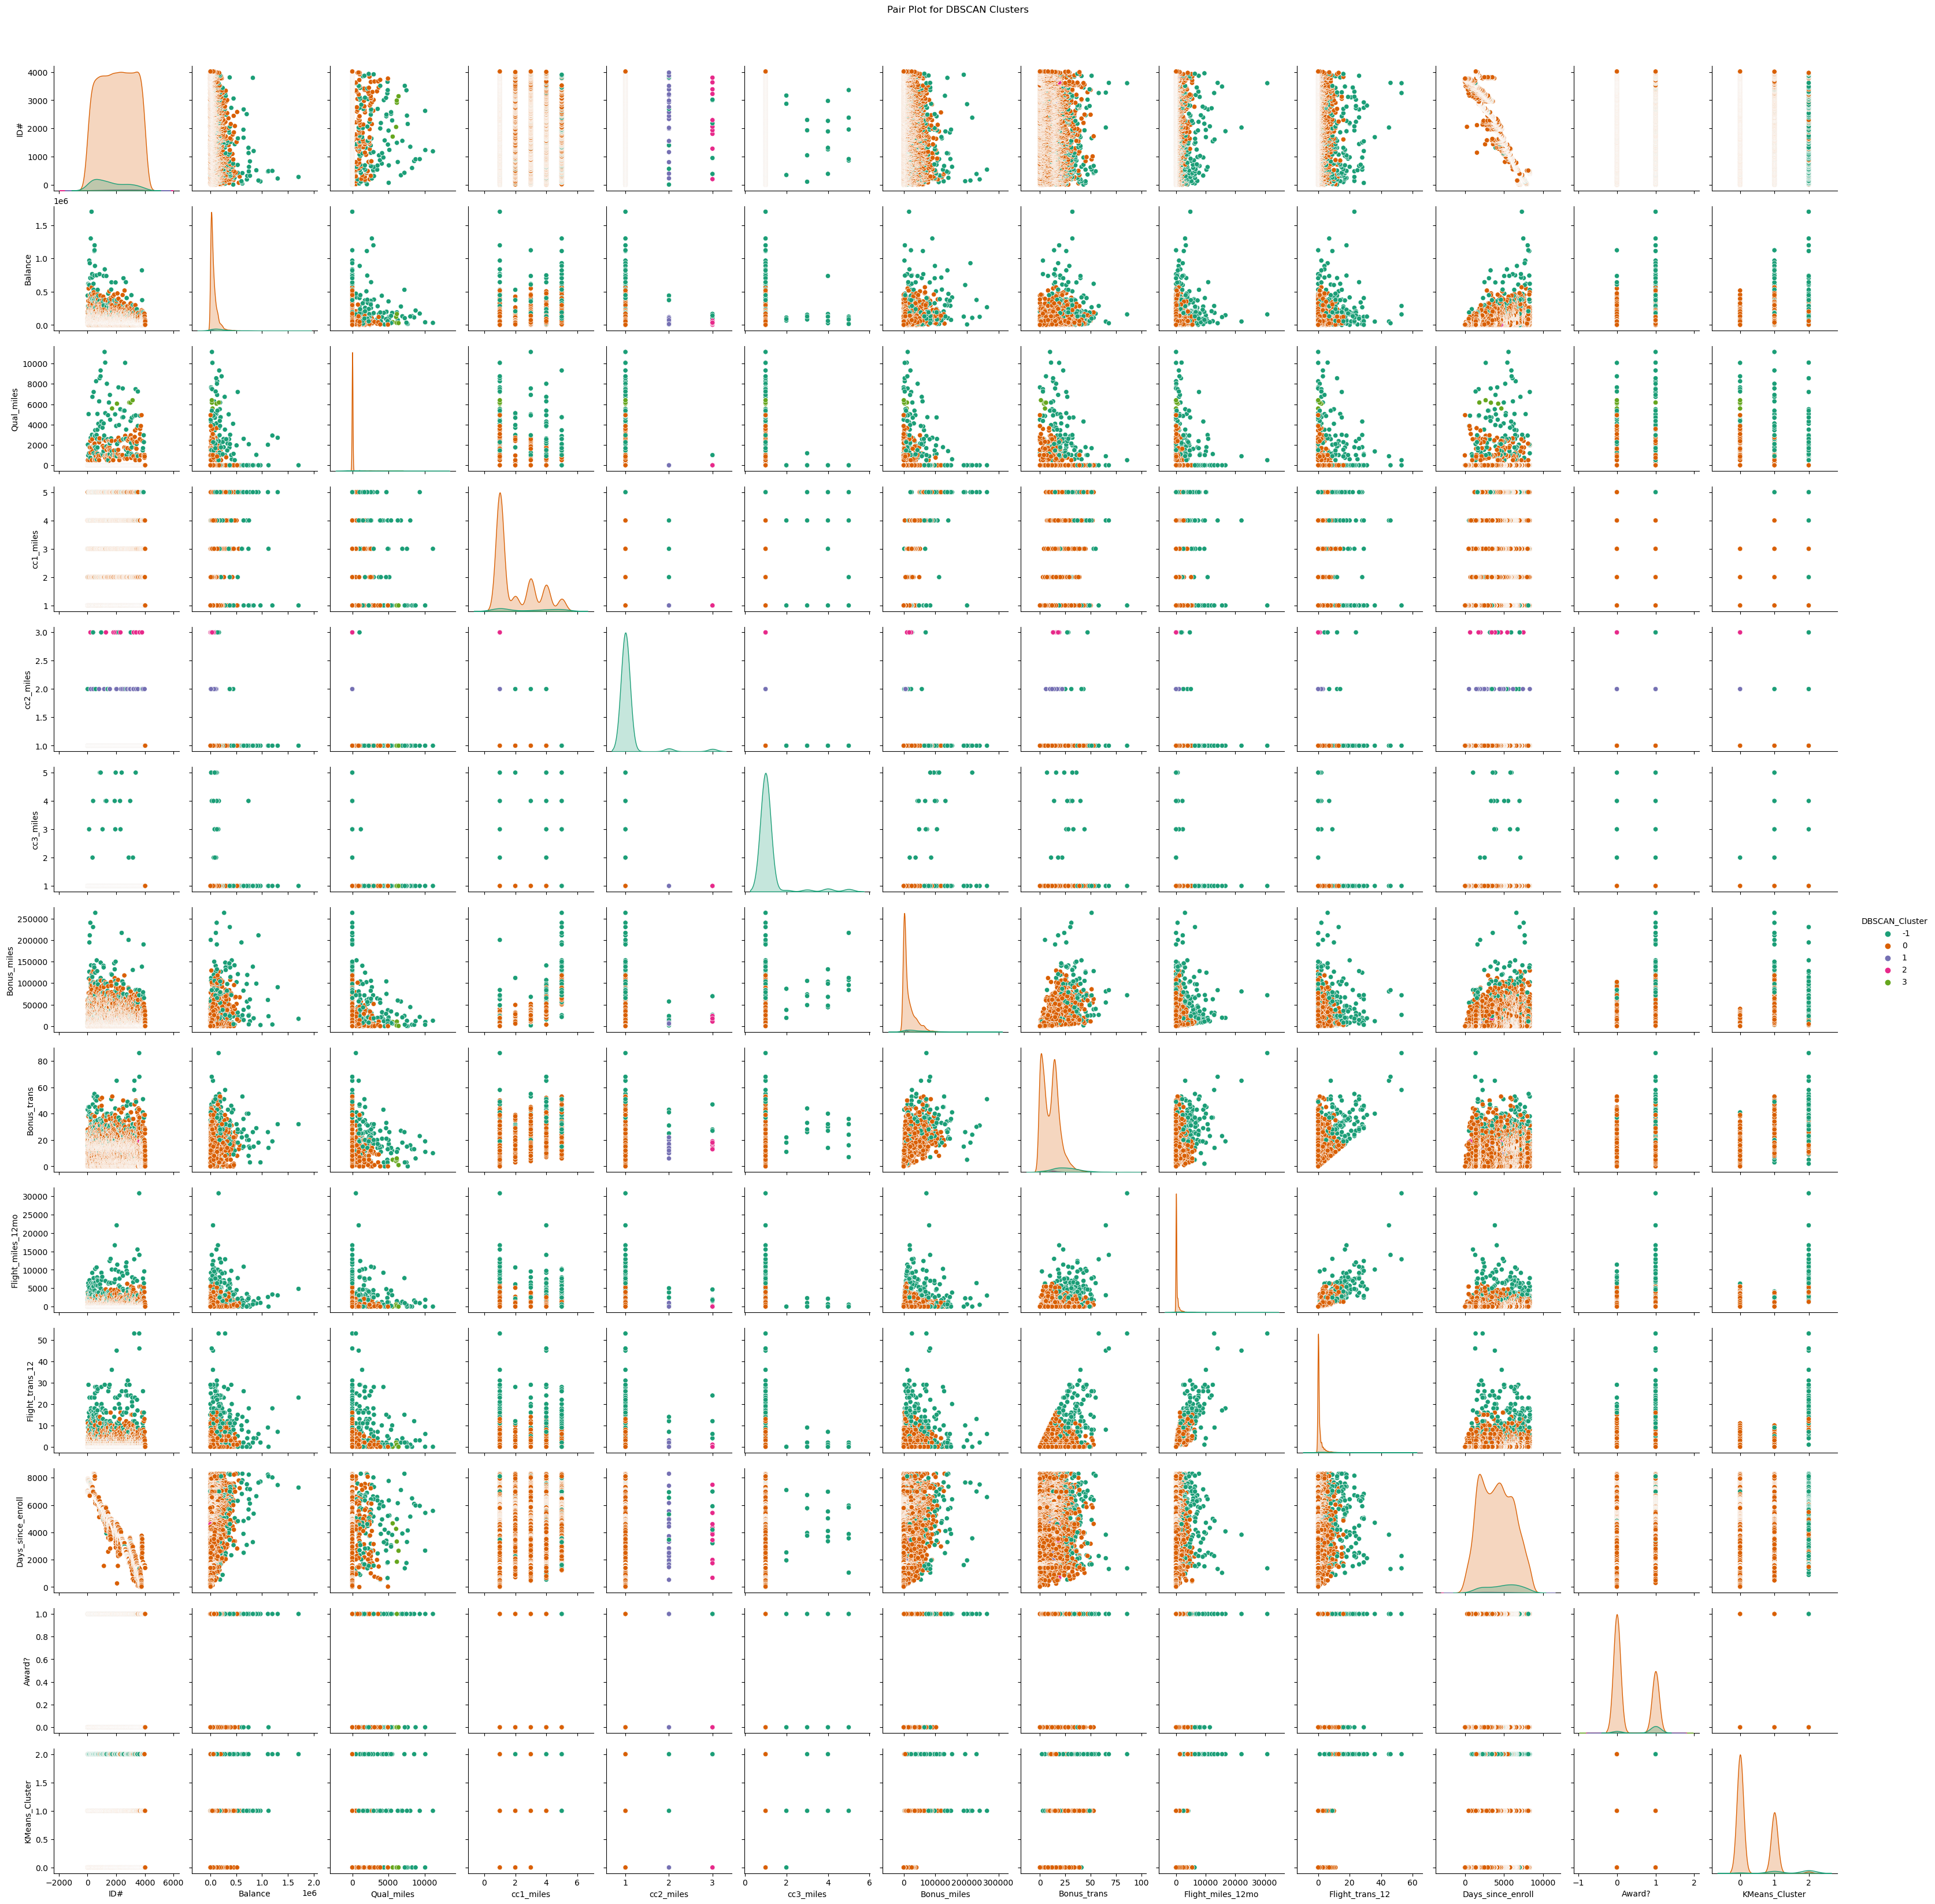

In [15]:

# Pair plot for DBSCAN clusters
sns.pairplot(airlines_data, hue='DBSCAN_Cluster', palette='Dark2', diag_kind='kde')
plt.suptitle('Pair Plot for DBSCAN Clusters', y=1.02)
plt.show()